In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

'%.3f'

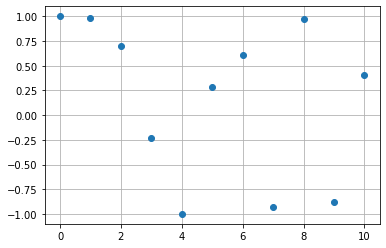

In [2]:
x = np.linspace(0, 10, num=11, endpoint=True)

y = np.cos(-x**2 / 5.0)
plt.plot(x, y, 'o')
plt.grid(True)

### 線形補完

In [3]:
from scipy import interpolate

f = interpolate.interpid(x, y, 'linear')
plt.plot(x, f(x), '-')
plt.grid(True)

AttributeError: module 'scipy.interpolate' has no attribute 'interpid'

### スプライン３次補完

In [5]:
# dir(interpolate)

### 最適化

In [6]:
from scipy.optimize import fsolve

In [7]:
def f(x):
    y = 2 * x**2 + 2 * x - 10
    return y

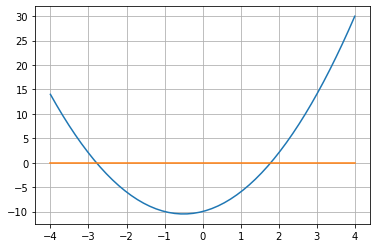

In [8]:
x = np.linspace(-4, 4)
plt.plot(x, f(x))
plt.plot(x, np.zeros(len(x)))
plt.grid(True)

In [13]:
x = fsolve(f, 2)
print(x, f(2))

[1.791] 2


In [14]:
x = fsolve(f, -3)
print(x, f(-3))

[-2.791] 2


### 最適化問題を解く

In [16]:
from scipy.optimize import minimize

In [17]:
# 目的となる関数

In [18]:
def objective(x):
    [x1, x2, x3, x4] = x
    return x1*x4*(x1+x2+x3)+x3

# 制約式その１
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3] - 25.0

# 制約式その２
def constraint2(x):
    sum_sq = 40
    for i in range(4):
        sum_sq = sum_sq - x[1]**2
    return sum_sq

# 初期値
x0 = [1, 5, 5, 1]
print(objective(x0))

16


In [20]:
b = (1.0, 5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
cons = [con1, con2]

In [22]:
sol = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)
print(sol)

     fun: 19.486832956563433
     jac: array([16.068,  1.581,  2.581,  9.162])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.   , 3.162, 5.   , 1.581])
